<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    325 non-null    object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

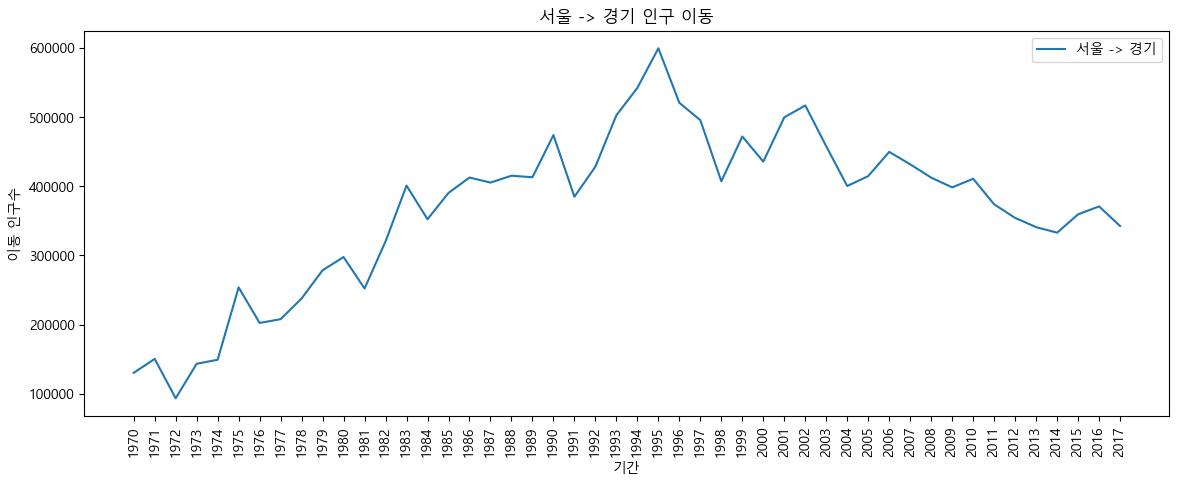

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df['전출지별'].value_counts()
# 셀병합 형식이기 때문에 앞데이터로 채움
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

df.info()
df.isna
df.describe()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

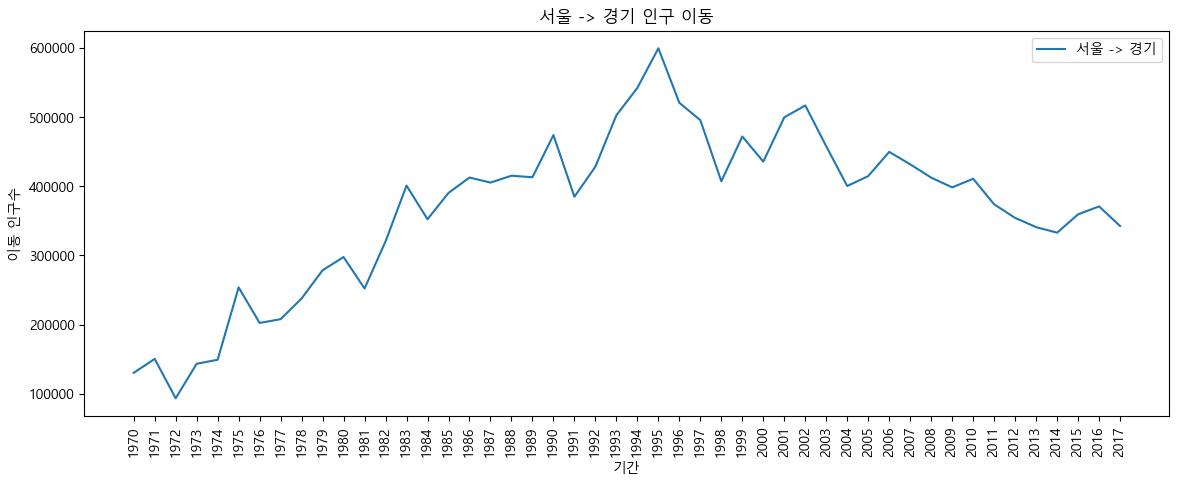

In [ ]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력